 ### Programming problem

Considering the `pd_speech.arff` dataset available, using `sklearn`, apply a stratified 70-30 training-testing
split with a fixed seed (`random_state=1`), and assess in a single plot the training and testing accuracies
of a decision tree with no depth limits (and remaining default behavior) for a varying number of selected
features in {5,10,40,100,250,700}. Feature selection should be performed before decision tree learning
considering the discriminative power of the input variables according to mutual information criterion
(`mutual_info_classif`)

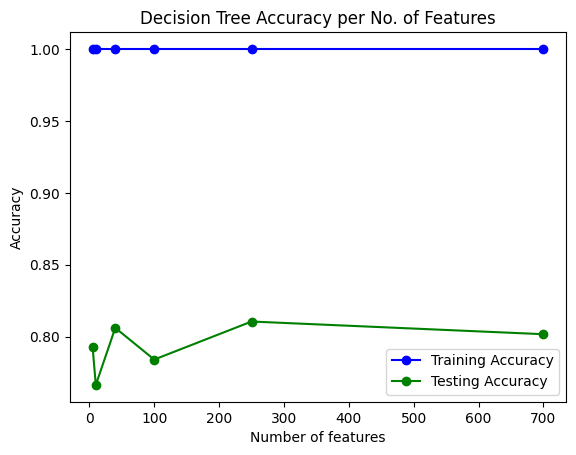

In [23]:
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from functools import partial
import matplotlib.pyplot as plt

# Read the ARFF file and separate input from output data, to encode as numeric
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
y = LabelEncoder().fit_transform(df['class'])

# Set number of features to consider and create lists to store the accuracies
num_feats = [5, 10, 40, 100, 250, 700]
train_acc = []
test_acc = []

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)

# Loop over the number of features
for n in num_feats:
    # Select features to fit the data to
    selector = SelectKBest(partial(mutual_info_classif, random_state=1), k=n)
    X_train_selec = selector.fit_transform(X_train, y_train)
    X_test_selec = selector.transform(X_test)
    # Fit Decision Tree Classification to the training set
    classifier = DecisionTreeClassifier(random_state=1)
    classifier.fit(X_train_selec, y_train)
    # Predict the training and testing sets results
    y_train_pred = classifier.predict(X_train_selec)
    y_test_pred = classifier.predict(X_test_selec)
    # Calculate accuracy on both sets predictions
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Plot the results
plt.plot(num_feats, train_acc, '-bo', label='Training Accuracy')
plt.plot(num_feats, test_acc, '-go', label='Testing Accuracy')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy per No. of Features')
plt.legend()
plt.show()